In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the penguins dataset
dataset = pd.read_csv("penguins.csv")  # Make sure to provide the correct path to your dataset

# Display basic statistics about the dataset
print(dataset.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      342.000000     342.000000         342.000000   342.000000   
mean        43.921930      17.151170         200.915205  4201.754386   
std          5.459584       1.974793          14.061714   801.954536   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.225000      15.600000         190.000000  3550.000000   
50%         44.450000      17.300000         197.000000  4050.000000   
75%         48.500000      18.700000         213.000000  4750.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   344.000000  
mean   2008.029070  
std       0.818356  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000  


In [3]:
df = pd.DataFrame(dataset)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [5]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [8]:
# Calculate the mean values of each column
column_means = df.mean()

# Fill missing values in the specified columns with their respective means
columns_to_impute = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']

df[columns_to_impute] = df[columns_to_impute].fillna(column_means[columns_to_impute])

In [9]:
import pandas as pd

# List of columns to convert to numeric
columns_to_convert = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']

# Loop through the list of columns and convert to numeric
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [10]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,male,2007
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,female,2007
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,female,2007
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN,2007
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,female,2007


In [12]:
# Define a function to remove outliers using standard deviation
def remove_outliers_std(data_frame, column_name, std_threshold=3):
    column_mean = data_frame[column_name].mean()
    column_std = data_frame[column_name].std()
    lower_bound = column_mean - std_threshold * column_std
    upper_bound = column_mean + std_threshold * column_std

    data_frame = data_frame[(data_frame[column_name] >= lower_bound) & (data_frame[column_name] <= upper_bound)]
    return data_frame

# List of columns to remove outliers from
columns_to_remove_outliers = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']  

# Iterate through the list of columns and remove outliers
for column in columns_to_remove_outliers:
    df = remove_outliers_std(df, column)

## Visualization

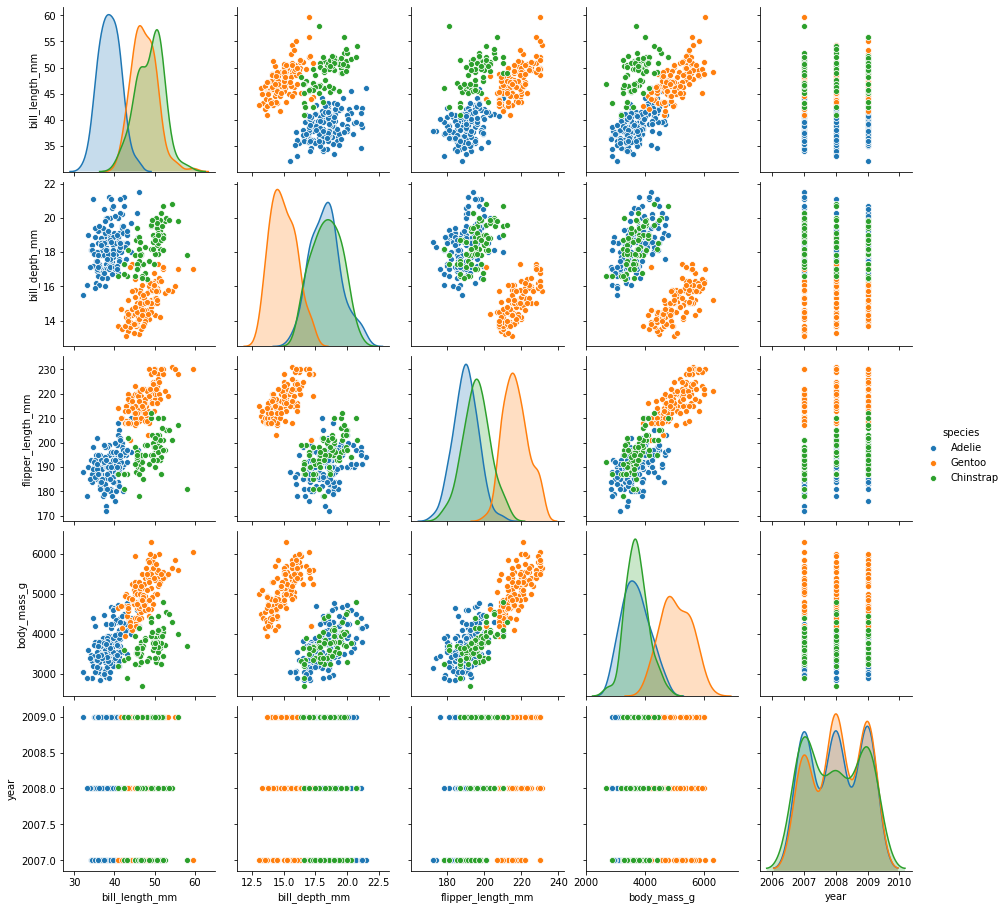

In [14]:
#A pairplot is a great way to visualize the relationships between numeric features.
sns.pairplot(df, hue="species")
plt.show()

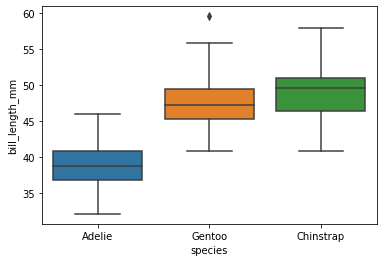

In [15]:
#Box plots can help you visualize the distribution and spread of numeric features.
sns.boxplot(x="species", y="bill_length_mm", data=df)
plt.show()

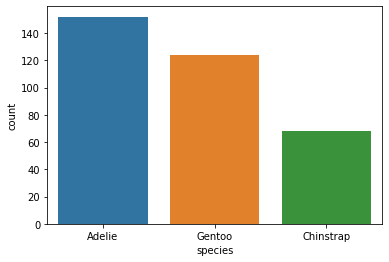

In [16]:
#Count plots can be used to visualize the distribution of categorical features.
sns.countplot(x="species", data=df)
plt.show()

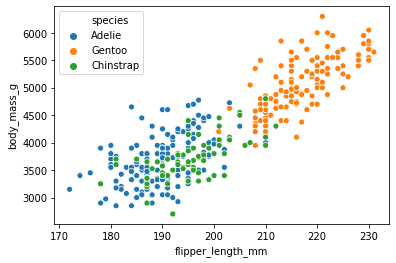

In [17]:
#Scatter plots can show relationships between two numeric variables.
sns.scatterplot(x="flipper_length_mm", y="body_mass_g", data=df, hue="species")
plt.show()

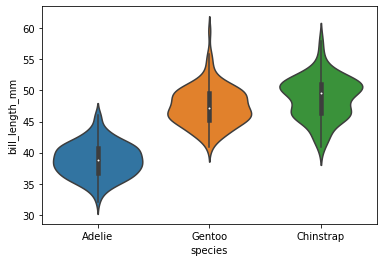

In [18]:
#Violin plots combine box plots with kernel density estimates.

sns.violinplot(x="species", y="bill_length_mm", data=df)
plt.show()

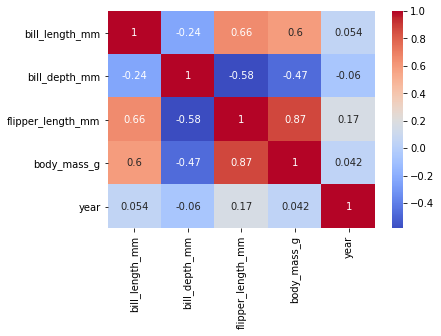

In [19]:
#A heatmap can show the correlation between numeric features.
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [20]:
# Remove the 'year' column from the DataFrame permanently as it is not useful for prediction.
df.drop(columns=['year'], inplace=True)

In [21]:
# Define a function to label encode and replace missing values with the mode
def label_encode_with_mode(data_frame, column_name):
    # Calculate the mode of the column
    mode = data_frame[column_name].mode().iloc[0]  # Get the first mode (in case of multiple modes)

    # Fill missing values with the mode
    data_frame[column_name].fillna(mode, inplace=True)

    # Use label encoding to convert the column to numeric
    data_frame[column_name] = data_frame[column_name].astype('category').cat.codes

# List of categorical columns to process
categorical_columns = ['species', 'island', 'sex']

# Iterate through the list of columns and label encode with mode replacement
for column in categorical_columns:
    label_encode_with_mode(df, column)

In [22]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,1
1,0,2,39.50000,17.40000,186.000000,3800.000000,0
2,0,2,40.30000,18.00000,195.000000,3250.000000,0
3,0,2,43.92193,17.15117,200.915205,4201.754386,1
4,0,2,36.70000,19.30000,193.000000,3450.000000,0


In [32]:
# Define the columns to be normalized
columns_to_normalize = ['flipper_length_mm', 'body_mass_g']

# Calculate min and max values for each column
min_values = df[columns_to_normalize].min()
max_values = df[columns_to_normalize].max()

# Normalize the dataset columns to the range [0, 1]
for column in columns_to_normalize:
    df[column] = (df[column] - min_values[column]) / (max_values[column] - min_values[column])

In [33]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,0.152542,0.291667,1
1,0,2,39.50000,17.40000,0.237288,0.305556,0
2,0,2,40.30000,18.00000,0.389831,0.152778,0
3,0,2,43.92193,17.15117,0.490088,0.417154,1
4,0,2,36.70000,19.30000,0.355932,0.208333,0


In [34]:
# Define your target 'y' and feature 'X' variables
X = df.drop('sex', axis=1)  # Features: All columns except 'sex'
y = df['sex']  # Target variable: 'sex' column

In [35]:
# Define the split ratio
split_ratio = 0.8  # 80% training, 20% testing

# Calculate the number of samples for training and testing
total_samples = len(X)
num_train_samples = int(np.round(total_samples * split_ratio))
num_test_samples = total_samples - num_train_samples

# Slice the data for training and testing
X_train = X.iloc[:num_train_samples]
X_test = X.iloc[-num_test_samples:]
y_train = y.iloc[:num_train_samples]
y_test = y.iloc[-num_test_samples:]

# Print the shapes of the training and testing sets
print("X_train Shape: ", X_train.shape)
print("y_train Shape: ", y_train.shape)
print()
print("X_test Shape: ", X_test.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (275, 6)
y_train Shape:  (275,)

X_test Shape:  (69, 6)
y_test Shape:  (69,)


In [36]:
class LogitRegression:

    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost(self, y_train, X_train):
        z = np.dot(X_train, self.weights) + self.bias
        h = self.sigmoid(z)

        parameter1 = -(y_train) * np.log(h)
        parameter2 = (1 - y_train) * np.log(1 - h)

        j = (1 / len(y_train)) * np.sum(parameter1 - parameter2)

        return j

    def gradient_descent(self, y_train, X_train):
        z = np.dot(X_train, self.weights) + self.bias
        pred = self.sigmoid(z)

        difference_y = pred - y_train

        update_weight = np.dot(X_train.T, difference_y) / len(y_train)
        update_bias = np.sum(difference_y) / len(y_train)

        return update_weight, update_bias

    def scaling(self, X):
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        X_scaled = (X - mean) / std
        return X_scaled

    def fit(self, X_train, y_train):
        X_scaled = self.scaling(X_train)
        rows, features = X_scaled.shape
        self.weights = np.random.uniform(0, 1, features)

        self.bias = 0.5
        loss = []

        for i in range(self.iterations):
            updated_weights, updated_bias = self.gradient_descent(y_train, X_scaled)
            loss.append(self.cost(y_train, X_scaled))

            self.weights = self.weights - (self.learning_rate * updated_weights)
            self.bias = self.bias - (self.learning_rate * updated_bias)

        return loss

    def predict(self, X_test):
        X_scaled = self.scaling(X_test)

        z = np.dot(X_scaled, self.weights) + self.bias
        y_hat = self.sigmoid(z)

        y_pred = [1 if y_value >= 0.5 else 0 for y_value in y_hat]

        return y_pred

In [37]:
def accuracy(y_test, y_pred):
    matched_values = np.sum(y_test == y_pred)
    return matched_values / len(y_test)

Learning Rate: 0.001, Iterations: 10000
Iteration 0, Weight 0: 0.019368
Iteration 1, Weight 1: 0.215603
Iteration 2, Weight 2: 0.473955
Iteration 3, Weight 3: 1.386185
Iteration 4, Weight 4: 0.534324
Iteration 5, Weight 5: 0.707313
Learning Rate: 0.001, Iterations: 50000
Iteration 0, Weight 0: -0.398116
Iteration 1, Weight 1: 0.199784
Iteration 2, Weight 2: 1.337713
Iteration 3, Weight 3: 2.476437
Iteration 4, Weight 4: 0.057959
Iteration 5, Weight 5: 1.939160
Learning Rate: 0.001, Iterations: 100000
Iteration 0, Weight 0: -0.947539
Iteration 1, Weight 1: 0.136512
Iteration 2, Weight 2: 1.640533
Iteration 3, Weight 3: 2.703672
Iteration 4, Weight 4: 0.154033
Iteration 5, Weight 5: 2.362995
Learning Rate: 0.01, Iterations: 10000
Iteration 0, Weight 0: -0.835204
Iteration 1, Weight 1: 0.136277
Iteration 2, Weight 2: 1.616419
Iteration 3, Weight 3: 2.784613
Iteration 4, Weight 4: 0.225171
Iteration 5, Weight 5: 2.257634
Learning Rate: 0.01, Iterations: 50000
Iteration 0, Weight 0: -1.5790

D:\anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


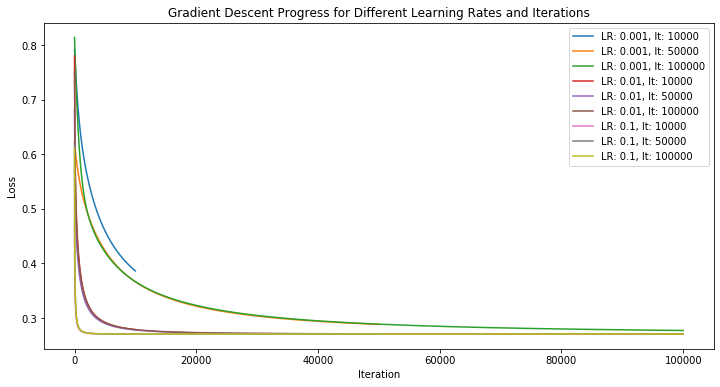

Learning Rate: 0.001, Iterations: 10000, Accuracy: 86.96%
Learning Rate: 0.001, Iterations: 50000, Accuracy: 88.41%
Learning Rate: 0.001, Iterations: 100000, Accuracy: 89.86%
Learning Rate: 0.01, Iterations: 10000, Accuracy: 88.41%
Learning Rate: 0.01, Iterations: 50000, Accuracy: 88.41%
Learning Rate: 0.01, Iterations: 100000, Accuracy: 88.41%
Learning Rate: 0.1, Iterations: 10000, Accuracy: 88.41%
Learning Rate: 0.1, Iterations: 50000, Accuracy: 88.41%
Learning Rate: 0.1, Iterations: 100000, Accuracy: 88.41%


In [39]:
# Define learning rates and iterations to explore
learning_rates = [0.001, 0.01, 0.1]
iteration_values = [10000, 50000, 100000]

# Create dictionaries to store loss and accuracy for each combination
loss_dict = {}
accuracy_dict = {}

# Iterate through learning rates and iterations
for lr in learning_rates:
    for iterations in iteration_values:
        # Create and train the model
        logistic_model = LogitRegression(lr, iterations)
        loss_values = logistic_model.fit(X_train, y_train)

        # Make predictions
        y_pred = logistic_model.predict(X_test)

        # Calculate accuracy
        accu = accuracy(y_test, y_pred)

        # Store the results
        key = (lr, iterations)
        loss_dict[key] = loss_values
        accuracy_dict[key] = accu

        # Print the weight vector for each iteration
        print(f"Learning Rate: {lr}, Iterations: {iterations}")
        for i, weight in enumerate(logistic_model.weights):
            print(f"Iteration {i}, Weight {i}: {weight:.6f}")

# Plot gradient progress for each combination of learning rate and iteration
plt.figure(figsize=(12, 6))
for lr, iterations in loss_dict.keys():
    plt.plot(loss_dict[(lr, iterations)], label="LR: {}, It: {}".format(lr, iterations))
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Gradient Descent Progress for Different Learning Rates and Iterations")
plt.legend()
plt.show()

# Print accuracy for each combination
for (lr, iterations), accu in accuracy_dict.items():
    print(f"Learning Rate: {lr}, Iterations: {iterations}, Accuracy: {accu * 100:.2f}%")